In [183]:
import pandas as pd
import matplotlib.pyplot as plt

In [184]:
dataset = pd.read_csv('data/KMeansData.csv')
dataset.head()

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [185]:
X = dataset.iloc[:, :].values
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

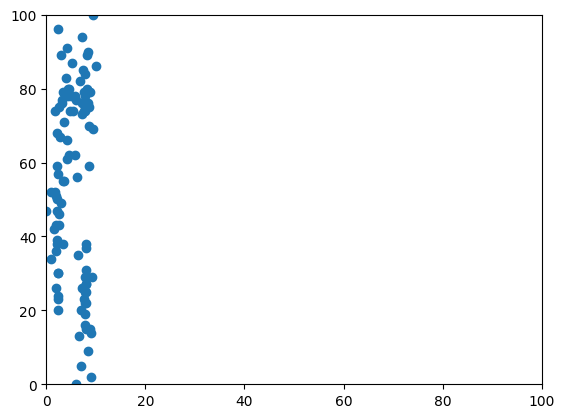

In [186]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.show()

In [187]:
#폭 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)
X_trans[:5], X[:5]

(array([[ 0.68729921,  0.73538376],
        [-0.66687438,  0.04198891],
        [-0.77161709,  0.04198891],
        [-0.9100271 ,  1.35173473],
        [-0.8090252 ,  0.96651537]]),
 array([[ 7.33, 73.  ],
        [ 3.71, 55.  ],
        [ 3.43, 55.  ],
        [ 3.06, 89.  ],
        [ 3.33, 79.  ]]))

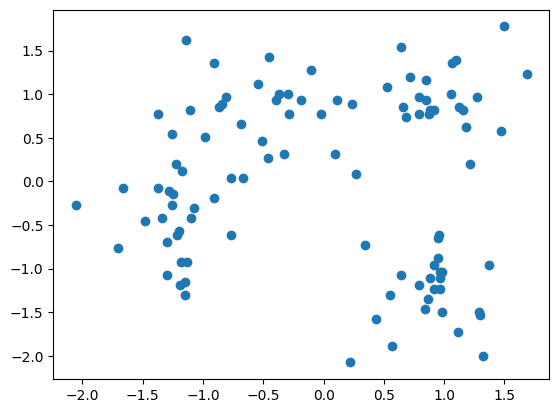

In [188]:
plt.scatter(X_trans[:, 0], X_trans[:, 1])

plt.show()

In [189]:
from sklearn.cluster import KMeans

inertia_list = []  #각 점들에서 중심점까지의 거리 제곱의 합
for i in range(1, 11, 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)  #모델생성
    kmeans.fit(X_trans)  #학습
    inertia_list.append(kmeans.inertia_)

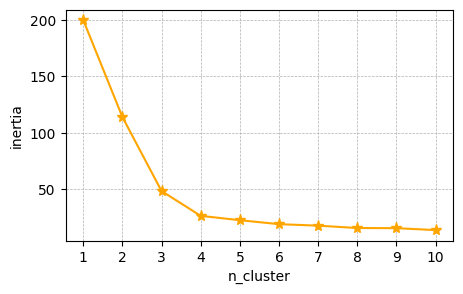

In [190]:
x = list(range(1, 11, 1))
y = inertia_list

plt.figure(figsize=(5, 3))
plt.plot(x, y, marker='*', ms=8, c='orange')
plt.grid(True, ls='--', lw=0.5)

plt.xticks([x for x in range(1, 11, 1)])
plt.xlabel('n_cluster')
plt.ylabel('inertia')

plt.show()  #3, 4

In [191]:
K = 4  #그룹의 개수: 0~3
kmeans = KMeans(n_clusters=K, random_state=0)  #모델생성
kmeans.fit(X_trans)  #학습

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [192]:
#예측
y_pred = kmeans.fit_predict(X_trans)
y_pred, X[:5]

(array([1, 0, 3, 0, 0, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 0, 2, 0,
        3, 2, 1, 1, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 0, 3, 2, 1, 3,
        3, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 2,
        2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2,
        1, 3, 0, 2, 0, 1, 3, 0, 1, 0, 2, 3], dtype=int32),
 array([[ 7.33, 73.  ],
        [ 3.71, 55.  ],
        [ 3.43, 55.  ],
        [ 3.06, 89.  ],
        [ 3.33, 79.  ]]))

In [193]:
dataset['cluster'] = y_pred
dataset.head()

,hour,score,cluster
0,7.33,73,1
1,3.71,55,0
2,3.43,55,3
3,3.06,89,0
4,3.33,79,0


In [194]:
filt = dataset['cluster']==0
dataset[filt].index

Index([ 1,  3,  4,  7,  9, 10, 15, 19, 21, 33, 37, 38, 39, 47, 51, 54, 55, 56,
       57, 67, 78, 85, 90, 92, 95, 97],
      dtype='int64')

In [195]:
import numpy as np
index = np.where(y_pred==0)
group0_hour = X[index, 0]  #시간
group0_score = X[index, 0]  #점수

In [196]:
for i in range(K):
    index = np.where(y_pred==i)
    print(i, X[index, 0], X[index, 1])

0 [[3.71 3.06 3.33 5.74 4.73 5.   4.13 3.67 2.86 4.5  5.43 4.44 3.17 1.83
  2.53 4.61 4.04 4.25 2.44 4.71 4.29 3.24 2.13 5.8  6.21 5.22]] [[55. 89. 79. 62. 74. 78. 66. 71. 67. 80. 74. 78. 76. 74. 75. 62. 83. 61.
  96. 80. 91. 77. 68. 78. 56. 87.]]
1 [[ 7.33  8.73  7.61  8.42  6.12  8.66  7.95  7.42  9.43  7.21  8.34  8.5
   6.91  7.26  7.76  8.58  7.83  7.85  9.5   8.33  7.61  8.89 10.    7.76]] [[ 73.  59.  74.  90.  77.  70.  75.  85.  69.  94.  89.  76.  82.  76.
   78.  75.  74.  75. 100.  80.  79.  79.  86.  84.]]
2 [[7.22 8.12 7.02 9.17 8.47 6.08 8.03 9.02 7.85 7.94 7.6  6.41 7.75 8.08
  7.94 6.96 8.11 8.94 8.08 7.81 8.07 8.06 8.97 8.03 6.65]] [[26. 15.  5. 29.  9.  0. 31.  2. 25. 22. 23. 35. 16. 27. 29. 20. 27. 15.
  22. 19. 25. 38. 14. 37. 13.]]
3 [[3.43 2.63 3.45 3.06 0.94 1.9  0.   2.16 2.24 2.31 2.43 2.03 1.53 2.14
  2.02 2.06 1.05 2.28 2.56 2.35 2.22 2.33 1.83 2.41 2.46]] [[55. 46. 38. 49. 34. 43. 47. 50. 38. 23. 20. 26. 42. 47. 36. 51. 52. 39.
  43. 57. 59. 30. 52. 24. 30.

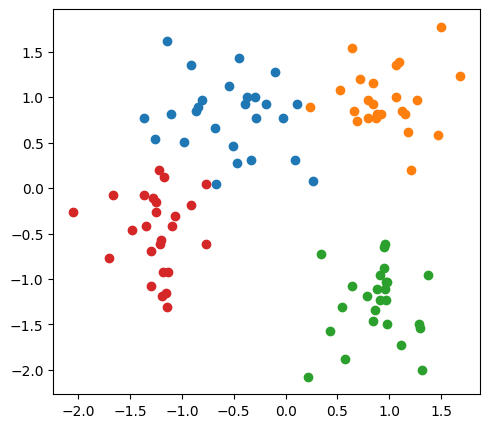

In [197]:
plt.figure(figsize=(5.5, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x = X_trans[index, 0]
    y = X_trans[index, 1]
    plt.scatter(x, y)

plt.show()

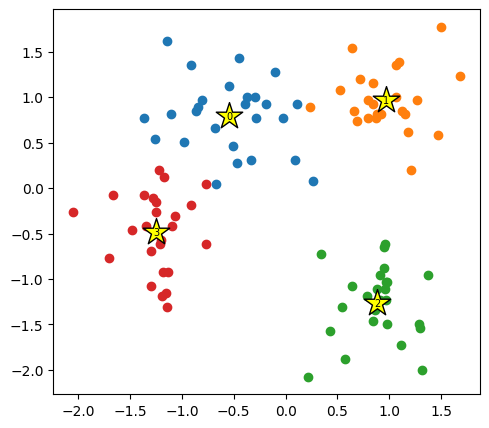

In [198]:
centers = kmeans.cluster_centers_

plt.figure(figsize=(5.5, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x = X_trans[index, 0]
    y = X_trans[index, 1]
    plt.scatter(x, y)

    plt.scatter(centers[i, 0], centers[i, 1], c='yellow', s = 400, ec='black',marker='*')
    plt.text(centers[i, 0], centers[i, 1], i, ha='center', va='center', size='7')

plt.show()

In [199]:
X_org = scaler.inverse_transform(X_trans)
X_org[:5]

centers_org = scaler.inverse_transform(centers)
centers_org

array([[ 4.04115385, 74.5       ],
       [ 8.08333333, 79.125     ],
       [ 7.8552    , 20.96      ],
       [ 2.1528    , 41.24      ]])

In [200]:
centers_org = scaler.inverse_transform(centers)
centers_org

array([[ 4.04115385, 74.5       ],
       [ 8.08333333, 79.125     ],
       [ 7.8552    , 20.96      ],
       [ 2.1528    , 41.24      ]])

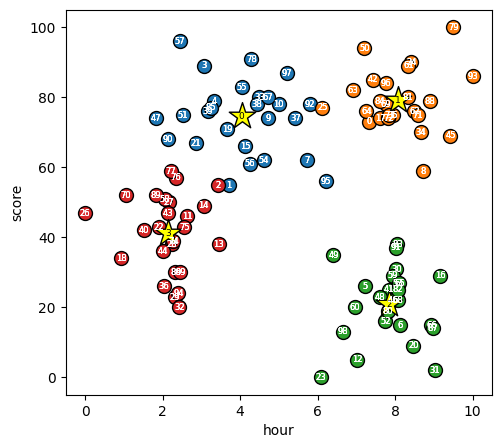

In [201]:
plt.figure(figsize=(5.5, 5))
for i in range(K):
    index = np.where(y_pred==i)
    x = X_org[index, 0]
    y = X_org[index, 1]
    plt.scatter(x, y, s=100, ec='black')

    for idx, x in enumerate(X_org):
        plt.text(x[0], x[1], idx, ha='center', va='center', size='6', color='white')

    plt.scatter(centers_org[i, 0], centers_org[i, 1], c='yellow', s = 400, ec='black',marker='*')
    plt.text(centers_org[i, 0], centers_org[i, 1], i, ha='center', va='center', size='6.5')

    plt.xlabel('hour')
    plt.ylabel('score')

plt.show()

In [202]:
dataset.loc[31, :]

hour       9.02
score      2.00
cluster    2.00
Name: 31, dtype: float64

In [203]:
# KMeans 모델생성
def model_kmeans(K):
    import pandas as pd
    from sklearn.cluster import KMeans

    kmeans = KMeans(n_clusters=K, random_state=0)

    dataset = pd.read_csv('data/KMeansData.csv')
    X =dataset.iloc[:, [0, 1]].values

    #x, y 스케일 조정
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_trans = scaler.fit_transform(X)

    kmeans.fit(X_trans)

    centers_org = scaler.inverse_transform(kmeans.cluster_centers_)
    return kmeans, X, X_trans, centers_org

In [204]:
model, X_org, X_trans, centers_org = model_kmeans(3)
y_pred = model.fit_predict(X_trans)
centers_org

array([[ 2.53282051, 52.48717949],
       [ 7.05861111, 78.33333333],
       [ 7.8552    , 20.96      ]])

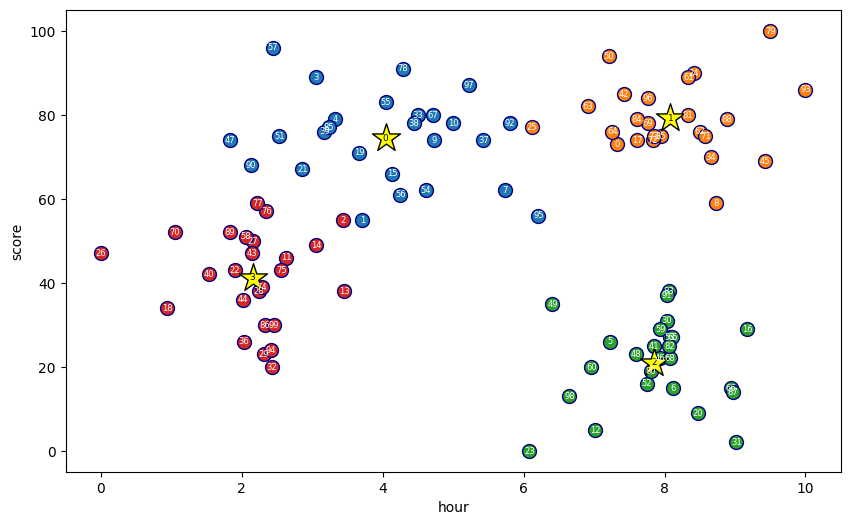

In [205]:
K=4

model, X_org, X_trans, centers_org = model_kmeans(K)
y_pred = model.fit_predict(X_trans)

plt.figure(figsize=(10, 6))
for i in range(K):
    index = np.where(y_pred==i)
    x = X_org[index, 0]
    y = X_org[index, 1]
    plt.scatter(x, y, s=100, ec='navy')

    cx = centers_org[i, 0]
    cy = centers_org[i, 1]

    plt.scatter(cx, cy, c='yellow', s = 450, ec='black', marker='*')
    plt.text(cx, cy, i, ha='center', va='center', size='6.5')

    plt.xlabel('hour')
    plt.ylabel('score')

for idx, x in enumerate(X_org):
    plt.text(x[0], x[1], idx, ha='center', va='center', size='6', color='white')

plt.show()

In [206]:
df_stu = pd.read_csv('data/학사관리/학생.csv')
df_stu.head()

,학생번호,학생이름,학생학과,학년,생년월일,지도교수
0,92414029,서연우,전산,3,73/10/06,228
1,92414033,김창덕,전산,4,73/10/26,221
2,92514009,이지행,전자,4,73/11/16,311
3,92514023,김형명,전자,4,73/08/29,311
4,92454018,이원구,건축,3,74/09/30,509


In [207]:
df_pro = pd.read_csv('data/학사관리/교수.csv')
df_pro.head()

,교수번호,교수이름,교수학과,임용일,교수직급,급여
0,221,이병렬,전산,75/04/03,정교수,3000000
1,228,이재광,전산,91/09/19,부교수,2500000
2,311,강승일,전자,94/06/09,부교수,2300000
3,509,오문환,건축,92/10/14,조교수,2000000


In [208]:
stu = list(df_stu['학생이름'])
pro = list(df_pro['교수이름'])
names = stu + pro
print(names)

['서연우', '김창덕', '이지행', '김형명', '이원구', '이재영', '박혜경', '김수정', '홍길동', '이병렬', '이재광', '강승일', '오문환']


In [209]:
df = pd.read_csv('data/KMeansData.csv')
df['name']=''
df.head(2)

,hour,score,name
0,7.33,73,
1,3.71,55,


In [210]:
import random
idx = random.randint(0, len(names)-1)
idx, names[idx]

(11, '강승일')

In [211]:
for i in range(len(df)):
    import random
    idx = random.randint(0, len(names)-1)
    df.loc[i, 'name']=names[idx]

df.tail()

,hour,score,name
95,6.21,56,홍길동
96,7.76,84,이원구
97,5.22,87,이재영
98,6.65,13,김수정
99,2.46,30,김수정


In [212]:
kmeans, X, X_trans, centers_org = model_kmeans(4)
y_pred = kmeans.fit_predict(X_trans)
df['cluster'] = y_pred
df.tail()

,hour,score,name,cluster
95,6.21,56,홍길동,0
96,7.76,84,이원구,1
97,5.22,87,이재영,0
98,6.65,13,김수정,2
99,2.46,30,김수정,3


In [214]:
for i in range(4):
    filt = df['cluster']==i
    df2 = df[filt]
    print(f'{i}그룹 {len(df2)}명----------------------------')
    names = df2["name"]
    count = 0

    for idx, name in enumerate(names):
        print(f'{idx}:{name}', end=' ')
        count+=1

        if count%10==0:print()
    print()

0그룹 26명----------------------------
0:이지행 1:김수정 2:김수정 3:박혜경 4:강승일 5:김수정 6:이재광 7:이병렬 8:홍길동 9:김창덕 
10:서연우 11:이지행 12:김수정 13:김수정 14:강승일 15:이재광 16:김창덕 17:김창덕 18:이병렬 19:김창덕 
20:홍길동 21:김창덕 22:이재영 23:박혜경 24:홍길동 25:이재영 
1그룹 24명----------------------------
0:서연우 1:강승일 2:이지행 3:이원구 4:이지행 5:김형명 6:이지행 7:강승일 8:오문환 9:이병렬 
10:김형명 11:오문환 12:오문환 13:이원구 14:서연우 15:이원구 16:김창덕 17:강승일 18:이병렬 19:김창덕 
20:이지행 21:박혜경 22:강승일 23:이원구 
2그룹 25명----------------------------
0:김창덕 1:이재영 2:서연우 3:김수정 4:김창덕 5:김창덕 6:김형명 7:서연우 8:이병렬 9:강승일 
10:김수정 11:박혜경 12:김수정 13:박혜경 14:오문환 15:이병렬 16:이병렬 17:이재영 18:홍길동 19:강승일 
20:김형명 21:김형명 22:서연우 23:이원구 24:김수정 
3그룹 25명----------------------------
0:이지행 1:이재영 2:홍길동 3:오문환 4:이지행 5:김창덕 6:이원구 7:이지행 8:서연우 9:이원구 
10:이지행 11:박혜경 12:박혜경 13:이병렬 14:김창덕 15:서연우 16:김창덕 17:김창덕 18:이병렬 19:김형명 
20:김수정 21:서연우 22:박혜경 23:박혜경 24:김수정 
